In [38]:
import nasdaqdatalink as quandl
import pandas as pd

In [39]:
data = pd.read_csv("nasdaq_screener_20230622.csv")
data.sort_values(by="Market Cap", ascending=False, inplace=True)
universe = data[data["Country"] == "United States"].head(100)
universe.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
22,AAPL,Apple Inc. Common Stock,$185.465,1.5050,0.818%,2.917123e+12,United States,1980.0,7281925,Technology,Computer Manufacturing
4540,MSFT,Microsoft Corporation Common Stock,$336.71,3.1500,0.944%,2.503603e+12,United States,1986.0,3687698,Technology,Computer Software: Prepackaged Software
3050,GOOG,Alphabet Inc. Class C Capital Stock,$121.605,0.3450,0.285%,1.544019e+12,United States,2004.0,3221308,Technology,Computer Software: Programming Data Processing
3051,GOOGL,Alphabet Inc. Class A Common Stock,$120.94,0.3900,0.324%,1.535575e+12,United States,2004.0,5474863,Technology,Computer Software: Programming Data Processing
419,AMZN,Amazon.com Inc. Common Stock,$127.9599,3.1299,2.507%,1.312914e+12,United States,1997.0,15850686,Consumer Discretionary,Catalog/Specialty Distribution


In [45]:
quandl.ApiConfig.api_key = 'NRvcyMwNMXZ2ooDSM3nw'
universe = quandl.get_table('SHARADAR/SP500', action='current')
universe.head()

,date,action,ticker,name,contraticker,contraname,note
None,,,,,,,
0,2023-09-23,current,ZTS,ZOETIS INC,N/A,N/A,None
1,2023-09-23,current,ZION,ZIONS BANCORPORATION NATIONAL ASSOCIATION,N/A,N/A,None
2,2023-09-23,current,ZBRA,ZEBRA TECHNOLOGIES CORP,N/A,N/A,None
3,2023-09-23,current,ZBH,ZIMMER BIOMET HOLDINGS INC,N/A,N/A,None
4,2023-09-23,current,YUM,YUM BRANDS INC,N/A,N/A,None


In [46]:
fundamentals = quandl.get_table('SHARADAR/SF1', datekey={'gte':'2023-03-31','lte':'2023-08-31'}, dimension="ART", ticker=",".join(universe['ticker'].to_list()))
fundamentals = fundamentals.drop_duplicates("ticker", keep="first")
fundamentals.head()
# 'ticker', 'dimension', 'calendardate', 'datekey', 'reportperiod', 'lastupdated', 'accoci', 'assets', 'assetsavg', 'assetsc', 'assetsnc', 'assetturnover', 'bvps', 'capex', 'cashneq', 'cashnequsd', 'cor', 'consolinc', 'currentratio', 'de', 'debt', 'debtc', 'debtnc', 'debtusd',
# 'deferredrev', 'depamor', 'deposits', 'divyield', 'dps', 'ebit', 'ebitda', 'ebitdamargin', 'ebitdausd', 'ebitusd', 'ebt', 'eps', 'epsdil', 'epsusd', 'equity', 'equityavg', 'equityusd', 'ev', 'evebit', 'evebitda', 'fcf', 'fcfps', 'fxusd', 'gp', 'grossmargin', 'intangibles', 'intexp',
# 'invcap', 'invcapavg', 'inventory', 'investments', 'investmentsc', 'investmentsnc', 'liabilities', 'liabilitiesc', 'liabilitiesnc', 'marketcap', 'ncf', 'ncfbus', 'ncfcommon', 'ncfdebt', 'ncfdiv', 'ncff', 'ncfi', 'ncfinv', 'ncfo', 'ncfx', 'netinc', 'netinccmn', 'netinccmnusd',
# 'netincdis', 'netincnci', 'netmargin', 'opex', 'opinc', 'payables', 'payoutratio', 'pb', 'pe', 'pe1', 'ppnenet', 'prefdivis', 'price', 'ps', 'ps1', 'receivables', 'retearn', 'revenue', 'revenueusd', 'rnd', 'roa', 'roe', 'roic', 'ros', 'sbcomp', 'sgna', 'sharefactor', 'sharesbas',
# 'shareswa', 'shareswadil', 'sps', 'tangibles', 'taxassets', 'taxexp', 'taxliabilities', 'tbvps', 'workingcapital'
# https://data.nasdaq.com/tables/SHARADAR-INDICATORS/export?api_key=2t6jF1958vkM2PYyDF1v&table%5B%5D=SF1&table%5B%5D=TICKERS

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
None,,,,,,,,,,,,,,,,,,,,,
0,ZTS,ART,2023-06-30,2023-08-08,2023-06-30,2023-08-08,-895000000,13749000000,1.402550e+10,6.183000e+09,...,460316905,461900000,462900000.0,17.800,9783000000,192000000,619000000.0,486000000,21.180,4.414000e+09
2,ZION,ART,2023-06-30,2023-08-04,2023-06-30,2023-08-07,-2930000000,87230000000,8.845550e+10,NaN,...,148145133,147692000,147696000.0,21.091,86168000000,0,265000000.0,0,583.430,NaN
4,ZBRA,ART,2023-06-30,2023-08-01,2023-07-01,2023-08-01,-60000000,7456000000,7.476750e+09,1.753000e+09,...,51338364,51338364,NaN,107.132,2983000000,461000000,153000000.0,91000000,58.105,-1.700000e+07
6,ZBH,ART,2023-06-30,2023-08-01,2023-06-30,2023-08-01,-177800000,21294300000,2.123428e+10,4.387900e+09,...,208964134,208600000,209900000.0,34.494,7522900000,0,159800000.0,932200000,36.064,2.154200e+09
8,YUM,ART,2023-06-30,2023-08-07,2023-06-30,2023-08-07,-293000000,5848000000,5.805500e+09,1.515000e+09,...,280211281,280211281,NaN,24.949,4838000000,821000000,303000000.0,50000000,17.266,2.800000e+07


In [47]:
# Value
fundamentals["cash_flow_yield"] = fundamentals['ncfo'] / fundamentals['marketcap']
fundamentals["dividend_yield"] = fundamentals['dps'] / fundamentals['price']
fundamentals["book_price"] = fundamentals['equityusd'] / fundamentals['marketcap']
fundamentals["earings_yield"] = fundamentals['epsusd'] / fundamentals['price']

In [48]:
fundamentals["fcfev"] = fundamentals["fcf"] / fundamentals["ev"]
fundamentals["fcfmargin"] = fundamentals["fcfps"] / fundamentals["price"]
signals = fundamentals[["ticker", "roe", "grossmargin", "de", "fcfev", "fcfmargin"]]

In [49]:
fundamentals.head()

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,taxexp,taxliabilities,tbvps,workingcapital,cash_flow_yield,dividend_yield,book_price,earings_yield,fcfev,fcfmargin
None,,,,,,,,,,,,,,,,,,,,,
0,ZTS,ART,2023-06-30,2023-08-08,2023-06-30,2023-08-08,-895000000,13749000000,1.402550e+10,6.183000e+09,...,619000000.0,486000000,21.180,4.414000e+09,0.022941,0.007660,0.053077,0.025145,0.013986,0.014744
2,ZION,ART,2023-06-30,2023-08-04,2023-06-30,2023-08-07,-2930000000,87230000000,8.845550e+10,NaN,...,265000000.0,0,583.430,NaN,0.264345,0.043249,0.940427,0.149789,0.155274,0.239979
4,ZBRA,ART,2023-06-30,2023-08-01,2023-07-01,2023-08-01,-60000000,7456000000,7.476750e+09,1.753000e+09,...,153000000.0,91000000,58.105,-1.700000e+07,0.017126,0.000000,0.228755,0.049339,0.009495,0.011163
6,ZBH,ART,2023-06-30,2023-08-01,2023-06-30,2023-08-01,-177800000,21294300000,2.123428e+10,4.387900e+09,...,159800000.0,932200000,36.064,2.154200e+09,0.046785,0.006949,0.428548,0.017372,0.020921,0.024872
8,YUM,ART,2023-06-30,2023-08-07,2023-06-30,2023-08-07,-293000000,5848000000,5.805500e+09,1.515000e+09,...,303000000.0,50000000,17.266,2.800000e+07,0.041813,0.017393,-0.222825,0.037155,0.026107,0.033780


<Axes: >

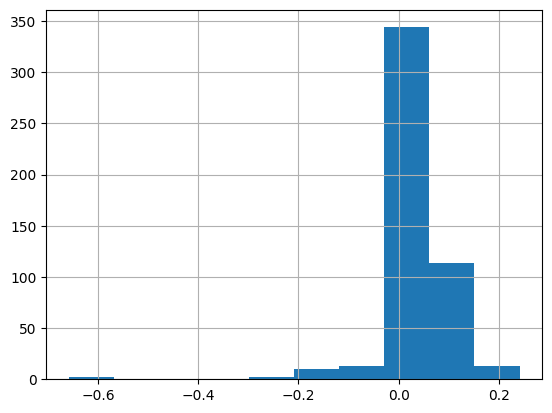

In [50]:
fundamentals["earings_yield"].hist()

<Axes: >

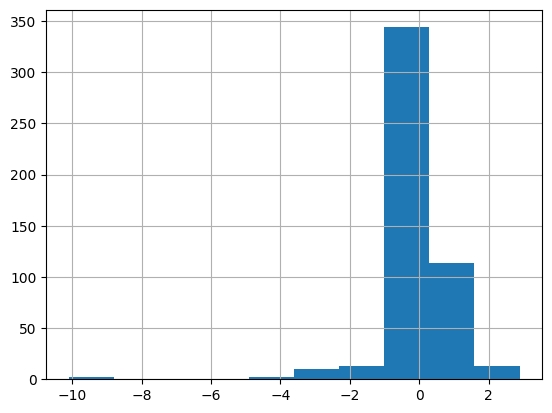

In [51]:
cap_weighted_mean = (fundamentals["earings_yield"] * fundamentals['marketcap']) / fundamentals['marketcap'].sum()
fundamentals["earings_yield_z"] = (fundamentals["earings_yield"] - fundamentals["earings_yield"].mean()) / fundamentals["earings_yield"].std()
fundamentals["earings_yield_z"].hist()

In [18]:
fundamentals.to_csv("fundamental_data.csv")